Keilee CLayton
HW 7

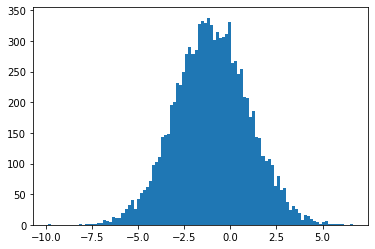

In [8]:
from math import pi, cos, sin, log
from numpy import random 

def gaussian(sigma, offset): 
    theta = 2* pi * random.random()
    r = (-2 * sigma**2 * log(1-random.random()))**(1/2)
    return (r*cos(theta) + offset) #x 
    #y = r*sin(theta)
 

xlist = [] 
for z in range(10000):
    xlist.append(gaussian(2,-1))
    

import matplotlib.pyplot as plt
import numpy as np

plt.hist(xlist,bins= 100) #plot histogram
plt.show()

Radioactive decay

9978
22


Text(17000, 7000, 'Bismith209 Atoms-Magenta')

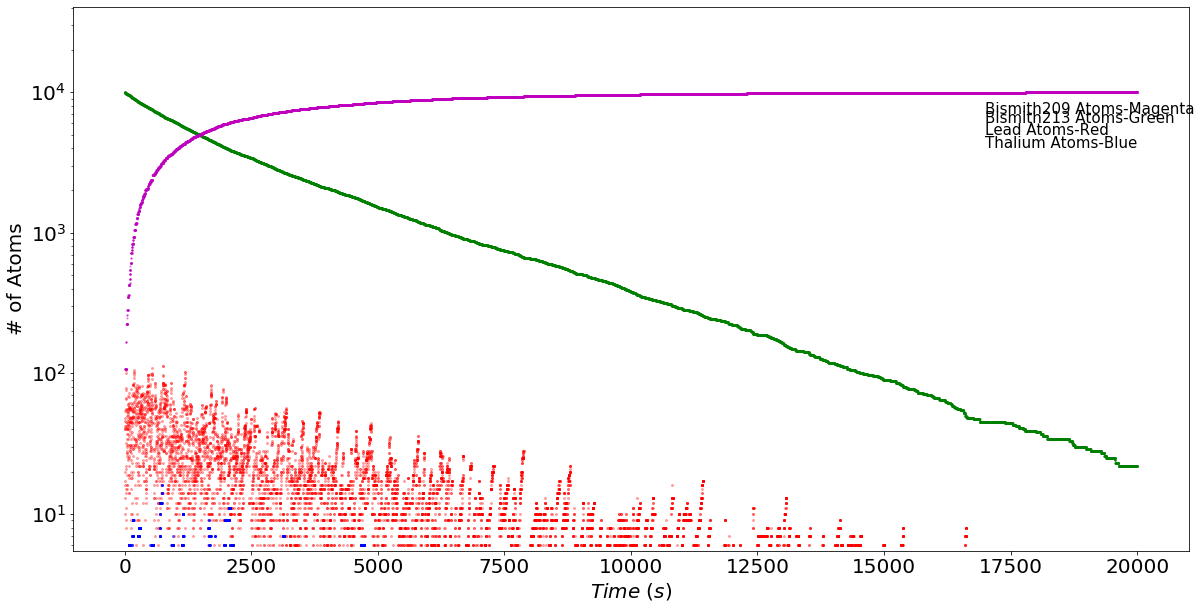

In [23]:
from random import random
from numpy import arange
from matplotlib import pyplot as plt
import time

#Constants
BI1 = 10000 # numb of bis 213 atoms
TI1 = 0 #lithium atoms
NPb = 0 # numb of lead atoms
Bi = 0 #bi209 atoms
tau = 46*60 # half-life of BI (s)
h = 1.0 #size of time step (s)
p = 1- (2**(-h/tau)) #prob of decay in one step
p_npb = 1- (2**(-h/(3.3*60))) #prob of decay NPb
p_TI = 1- (2**(-h/(2.2*60))) #prob of decay TI
tmax = 20000 # total time

#create lists of atoms
tpoints = arange(0.0, tmax, h)
BIpoints = []
PBpoints = []
TIpoints = []
Bipoints = []

#Main loop
for t in tpoints:
    BIpoints.append(BI1)
    PBpoints.append(NPb)
    TIpoints.append(TI1)
    Bipoints.append(Bi)
    
    # calculate the numb of atoms that decay
    decay3 = 0
    for i in range(NPb):
        if random() < p_npb:
            decay3 += 1
        NPb -= decay3
        Bi += decay3 
    
    decay2 = 0
    for i in range(TI1):
        if random() < p_TI:
            decay2 += 1
        TI1 -= decay2
        NPb += decay2   
        
    decay = 0
    for i in range(BI1):
        if random() < p:
            decay += 1 
    
            if random() > 0.0209:
                NPb += decay
                BI1 -= decay
            else:
                TI1 += decay
                BI1 -= decay
        
        
print(PBpoints[-1] +TIpoints[-1] + Bipoints[-1]) #check to # of atoms 
print(BIpoints[-1])

#plot figure of numb of atoms as a function of time
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_yscale('log') #when log scale set you can better see lead but not thalium compared to non log scale
ax.scatter(tpoints, BIpoints, s= 2, c= 'g', alpha =0.3)
ax.scatter(tpoints, PBpoints, s= 4, c= 'r', alpha =0.3)
ax.scatter(tpoints, Bipoints, s= 2, c= 'm', alpha =0.3)
ax.scatter(tpoints, TIpoints, s= 4, c= 'b', alpha =0.5)
ax.set_xlabel("$Time$ $(s)$", size = 20)
ax.set_ylabel("# of Atoms", size = 20)
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)

ax.text(17000, 6000, "Bismith213 Atoms-Green",size=15)
ax.text(17000, 5000, "Lead Atoms-Red",size=15)
ax.text(17000, 4000, "Thalium Atoms-Blue",size=15)
ax.text(17000, 7000, "Bismith209 Atoms-Magenta",size=15)
